<font color = green >


# HOMEWORK Lesson19 - PCA

</font>


In [1]:
#----Load library
import numpy as np
import pandas as pd


<font color = green >


# LOAD_BREAST CANCER

</font>


In [2]:
#----Load data
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
print(breast_data.shape)

breast_labels = breast.target
print(breast_labels.shape)

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
print(final_breast_data.shape)

(569, 30)
(569,)
(569, 31)


In [3]:
#----Create Dataframe
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<font color = green >


# PCA execution for 2 components

</font>


In [4]:
#-----PCA
#----Applying Scaler
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x_scaled = StandardScaler().fit_transform(x) # normalizing the features
x_scaled.shape
np.mean(x_scaled),np.std(x_scaled)

feat_cols = ['feature'+str(i) for i in range(x_scaled.shape[1])]
normalised_breast = pd.DataFrame(x_scaled,columns=feat_cols)

from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x_scaled)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])


<font color = green >


# Plotting results for 2 Principal components

</font>


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

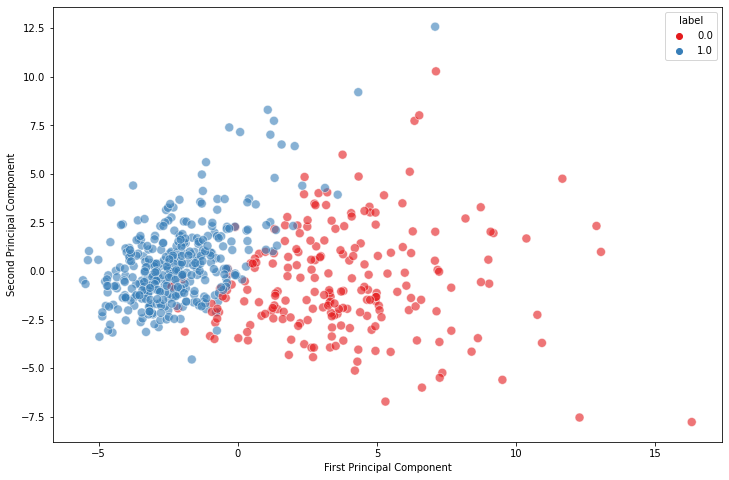

In [23]:
#------Plotting
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.figure(figsize=(12,8))
sns.scatterplot(principalComponents_breast[:,0], principalComponents_breast[:,1], hue=breast_dataset['label'], palette ='Set1',s=80, c='r',alpha=0.6 )
# plt.scatter(principalComponents_breast[:,0], principalComponents_breast[:,1], s=80, c='r',alpha=0.6)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<font color = blue >

### Expected output

</font>

<img src = "./breast_cancer_pca.png" align = 'left'>